# Kmeans Experiment

In [1]:
import numpy as np
import random
import math
import statistics
from time import time

class KmeansCluster(object):

    def __init__(self, n_clusters, threshold, 
                 max_iteration, search_times, method = "l2"):
        self.nclusters = n_clusters
        self.threshold = threshold
        self.max_iter = max_iteration
        self.search_times = search_times
        if method == "l1":
            self.method = 0
        else:
            if method == "l2":
                self.method = 1
            else:
                print("Invalid method index!")
        
    def centers_ini(self, data): 
        #set initial values for centers       
        data = np.array(data)
        length = data.shape[0]
        index = random.sample(range(length), self.nclusters)
        centers = [data[i] for i in index]
        return centers
    
    def distance(self, centers, data): 
        #calculate distances between points and centers
        data = np.array(data)
        length = data.shape[0]
        distance = np.zeros(shape = 
                            (data.shape[0], self.nclusters))   
        for i in range(length):
            for j in range(self.nclusters):
                tmp = data[i] - centers[j]
                distance[i,j] = (self.method * np.sum(tmp * tmp.T) 
                                 + (1-self.method) * np.sum(abs(tmp)))
        return distance
    
    def getlabels(self, distance, data):
        data = np.array(data)
        labels = []
        sum_distance_ = 0
        length = data.shape[0]
        for i in range(length):
            location = np.where(distance[i] == distance[i].min())
            labels.append(location[0][0])
            sum_distance_ = (sum_distance_ + 
                             self.method * math.sqrt(distance[i].min()) +
                             (1-self.method) * distance[i].min())
        return (np.array(labels), sum_distance_)
          
    def centers_update(self, labels, data): 
        #update centers of clusters
        data = np.array(data)
        centers = np.zeros(shape = (self.nclusters,
                                    data.shape[1]))
        for i in range(self.nclusters):
            tmp = data[np.where(labels == i)]
            if self.method == 1:
                for j in range(data.shape[1]):
                    centers[i, j] = statistics.mean(tmp[:, j])
            else:
                for j in range(data.shape[1]):
                    centers[i, j] = statistics.median(tmp[:, j])
        return centers
    
    def run(self, data):
        centers = self.centers_ini(data)
        distance = self.distance(centers, data)
        (labels, sum_dist_pre) = self.getlabels(distance, data)
        delta = self.threshold + 1
        iter_count = 0
        performance = [sum_dist_pre]
        while delta > self.threshold:
            centers = self.centers_update(labels, data)
            distance = self.distance(centers, data)
            (labels, sum_dist_post) = self.getlabels(distance, data)
            delta = sum_dist_pre - sum_dist_post
            sum_dist_pre = sum_dist_post
            performance.append(sum_dist_pre)
            iter_count = iter_count + 1
            if iter_count >= self.max_iter:
                break
        return (labels, iter_count, centers, np.array(performance))
    
    def fit(self, data):
        #fit function run the clustering process for several times 
        #in order to find the best clusters
        search = 1
        start = time()
        (labels, iter_count, centers, performance) = self.run(data)
        while search <= self.search_times:
            (label_search, iter_count_search, 
             centers_search, performance_search) = self.run(data)
            if performance_search.min() < performance.min():
                (labels, iter_count,
                 centers, performance) = (label_search, iter_count_search,
                                          centers_search, performance_search)
            search = search + 1
        (self.labels, self.centers, self.performance,
         self.iter_count) = (labels, 
                             centers, performance, iter_count)
        print("Iteration:{} Performance:{} Run_time:{} seconds".format(
            self.iter_count, self.performance.min(), time() - start))
        return self.labels
    
    def predict(self, pred_data):
        pred_data = np.array(pred_data)
        distance = self.distance(self.centers, pred_data)
        pred_labels = self.getlabels(distance, pred_data)
        return pred_labels

**I use iris data set to test my code**

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [9]:
kc = KmeansCluster(n_clusters = 3, threshold  = 0.001,
                   search_times = 5, max_iteration = 15, method = 'l2')
labels = kc.fit(iris.data)
kc2 = KmeansCluster(n_clusters = 3, threshold = 0.001,
                    search_times = 5, max_iteration = 15, method = 'l1')
labels2 = kc2.fit(iris.data)
print("\nResult of k-means using L2 penalty\n")
print(labels)
print("Result of k-means using L1 penalty\n")
print(labels2)

Iteration:4 Performance:97.17448640414453 Run_time:0.707430362701416 seconds
Iteration:4 Performance:159.29999999999998 Run_time:0.49227118492126465 seconds

Result of k-means using L2 penalty

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Result of k-means using L1 penalty

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


**Actual labels**

In [10]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Plot of performance**

Text(0.5,1,'Performance by Iteration Using L1 Penalty')

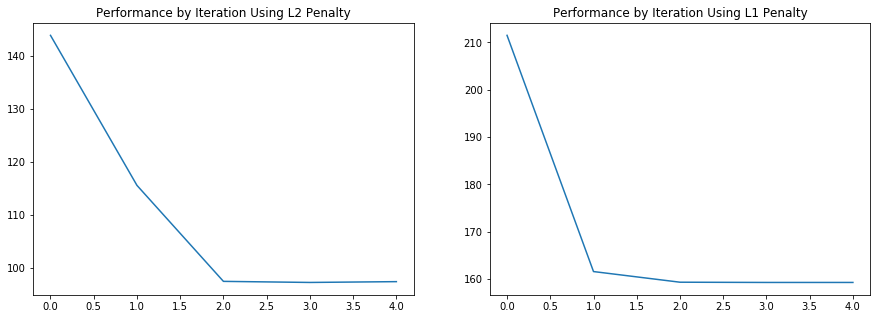

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(kc.performance)
plt.title("Performance by Iteration Using L2 Penalty")
plt.subplot(1,2,2)
plt.plot(kc2.performance)
plt.title("Performance by Iteration Using L1 Penalty")

## Rsult Visualization Using T-SNE

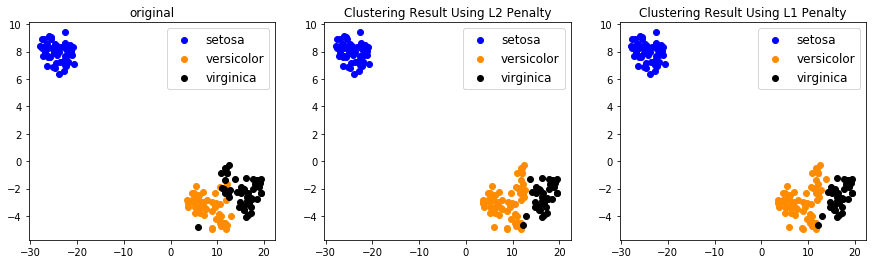

In [12]:
import pandas as pd
colors = ['blue', 'darkorange', 'black']
titles = ["original", "Clustering Result Using L2 Penalty",
         "Clustering Result Using L1 Penalty"]
label  = (iris.target, labels, labels2)

from sklearn.manifold import TSNE
data = TSNE(n_components = 2, 
           random_state = 47).fit_transform(iris.data)

def iris_visual_result(labels, colors, title):
    for n, color in enumerate(colors):
        tmp = data[np.where(labels == n)]
        plt.scatter(tmp[:, 0], tmp[:, 1], c = color,
                      label = iris.target_names[n])
    plt.title(title)
    plt.legend(scatterpoints = 1, loc = 'best',
              prop = dict(size = 12))

plt.figure(figsize = (15,4))
for i in range(3):
    plt.subplot(1,3, i+1)
    iris_visual_result(label[i], colors, titles[i])